<a href="https://colab.research.google.com/github/JCentercreation/Google-Colaboratory/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.3.0
1.18.5
2.4.3




NORMALIZACION DE LOS TENSORES
1
3
(60000, 28, 28)
47040000
uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252
 253 187   0   0   0   0   0   0   0   0]
float32
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  16.  93. 252. 253. 187.   0.   0.   0.   0.   0.   0.   0.   0.]




TRANSFORMACION DEL TENSOR
7
(10000,)
5
(60000,)
(10000, 10)
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]




DEFINICION DEL MODEL EN KERAS
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
___________________________________________________

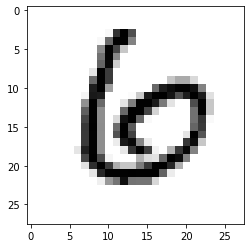

In [15]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
print(np.__version__)
import keras
print(keras.__version__)
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[8], cmap = plt.cm.binary)
print("\n")
print("\n")

print("NORMALIZACION DE LOS TENSORES")
print(y_train[8])
print(x_train.ndim) 
print(x_train.shape) #Nos indica que el tensor esta formado por 60000 matrices, cada una de ellas de 28 x 28
print(x_train.size)
print(x_train.dtype)
print(x_train[0, 16, :]) #Pedimos que muestre de la matriz 0 (la primera) todos los elementos de la fila 17
x_train = x_train.astype('float32') #Normalizamos la matriz a float32
print(x_train.dtype)
print(x_train[0, 16, :])
x_train = x_train.reshape(60000, 784) #Cambianos la forma del tensor y pasamos a un tensor 2D
x_test = x_test.astype('float32')
x_test = x_test.reshape(10000, 784)
print("\n")
print("\n")


print("TRANSFORMACION DEL TENSOR")
print(y_test[0])
print(y_test.shape)
print(y_train[0])
print(y_train.shape)
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes = 10) #Pasamos los escalares a un vector de 0 y1
y_train = to_categorical(y_train, num_classes = 10)
print(y_test.shape)
print(y_train.shape)
print(y_test[0])
print(y_train[0])
print("\n")
print("\n")


print("DEFINICION DEL MODEL EN KERAS")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense (10, activation = 'sigmoid', input_shape = (784,)))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()
print("\n")
print("\n")

print("CONFIGURACION DEL MODELO DE APRENDIZAJE")
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ['accuracy'])
print("\n")
print("\n")

print("ENTRENAMIENTO DEL MODELO")
model.fit(x_train, y_train, epochs = 5)
print("\n")
print("\n")

print("EVALUCION DEL MODELO")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)
print("\n")
print("\n")

print("GENERACION DE PREDICCIONES")
x_test = x_test.reshape(10000, 28, 28)
plt.imshow(x_test[11], cmap = plt.cm.binary)
x_test = x_test.reshape(10000, 784)

predictions = model.predict(x_test)
print(np.argmax(predictions[11]))
print(predictions[11])
